<a href="https://colab.research.google.com/github/santhosh635/Phase-2/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the file into a DataFrame
# Replace 'traffic_accidents_100.csv' with the actual uploaded file name if needed
df = pd.read_csv(next(iter(uploaded)))

# Display the first few rows
df.head()

Saving accidents.csv to accidents.csv


,Date,Time,Weather,Road_Type,Visibility,Severity,Latitude,Longitude
0,2023-01-01,08:30,Clear,Urban,150,1,51.50,-0.10
1,2023-01-02,08:30,Rain,Highway,50,2,51.51,-0.11
2,2023-01-03,08:30,Fog,Rural,200,3,51.52,-0.12
3,2023-01-04,08:30,Clear,Urban,30,1,51.53,-0.13
4,2023-01-05,08:30,Snow,Highway,100,2,51.54,-0.14


In [2]:

from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the file into a DataFrame
# Replace 'traffic_accidents_100.csv' with the actual uploaded file name if needed
df = pd.read_csv(next(iter(uploaded)))

# Display the first few rows
print("Sample Data:")
print(df.head())  # Prints the first 5 rows

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill missing values
# Check if the column exists before filling
if 'Weather_Condition' in df.columns:
    df['Weather_Condition'].fillna('Unknown', inplace=True)
if 'Road_Condition' in df.columns:
    df['Road_Condition'].fillna('Unknown', inplace=True)
if 'Sunrise_Sunset' in df.columns:
    df['Sunrise_Sunset'].fillna('Day', inplace=True)


# Normalize categorical values (simplify categories)
# Check if the column exists before normalizing
if 'Weather_Condition' in df.columns:
    df['Weather_Condition'] = df['Weather_Condition'].str.lower().str.strip()

# Optional: convert datetime
if 'Start_Time' in df.columns:
    df['Start_Time'] = pd.to_datetime(df['Start_Time'])
    print("\nSample Data with Converted DateTime:")
    print(df[['Start_Time']].head())  # Prints Start_Time column after conversion
else:
    print("\nColumn 'Start_Time' not found in the DataFrame.")
    # If the column has a different name, replace 'actual_column_name'
    # with the correct name and uncomment the following line:
    # df['actual_column_name'] = pd.to_datetime(df['actual_column_name'])
    # print("\nSample Data with Converted DateTime:")
    # print(df[['actual_column_name']].head())

Saving accidents.csv to accidents (1).csv
Sample Data:
         Date   Time Weather Road_Type  Visibility  Severity  Latitude  \
0  2023-01-01  08:30   Clear     Urban         150         1     51.50   
1  2023-01-02  08:30    Rain   Highway          50         2     51.51   
2  2023-01-03  08:30     Fog     Rural         200         3     51.52   
3  2023-01-04  08:30   Clear     Urban          30         1     51.53   
4  2023-01-05  08:30    Snow   Highway         100         2     51.54   

   Longitude  
0      -0.10  
1      -0.11  
2      -0.12  
3      -0.13  
4      -0.14  

Missing Values:
Date          0
Time          0
Weather       0
Road_Type     0
Visibility    0
Severity      0
Latitude      0
Longitude     0
dtype: int64

Column 'Start_Time' not found in the DataFrame.


<ipython-input-3-8ead269ccf75>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce') # Handle potential parsing errors


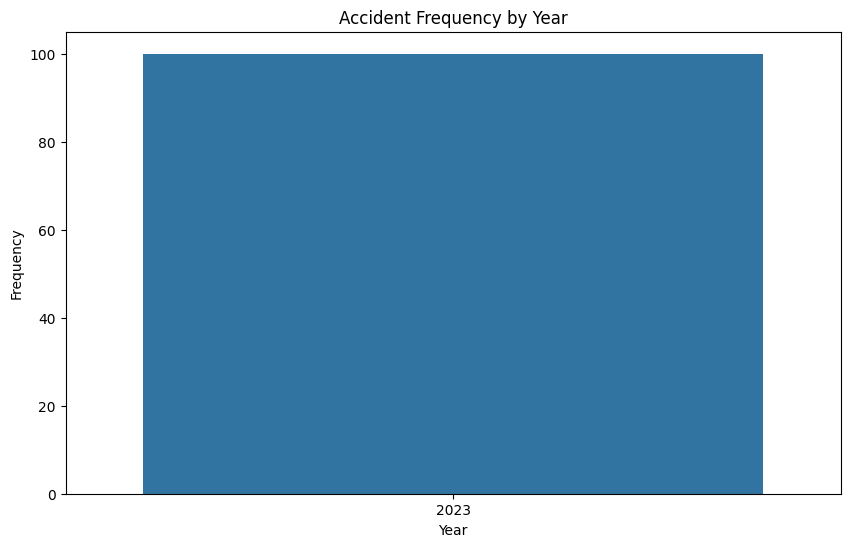

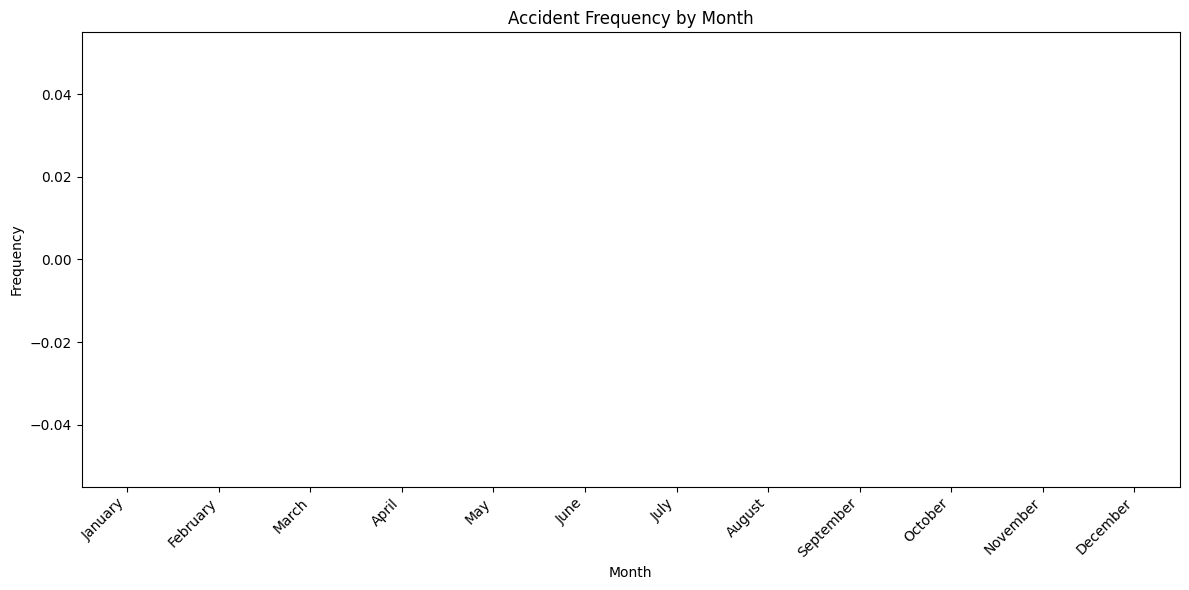

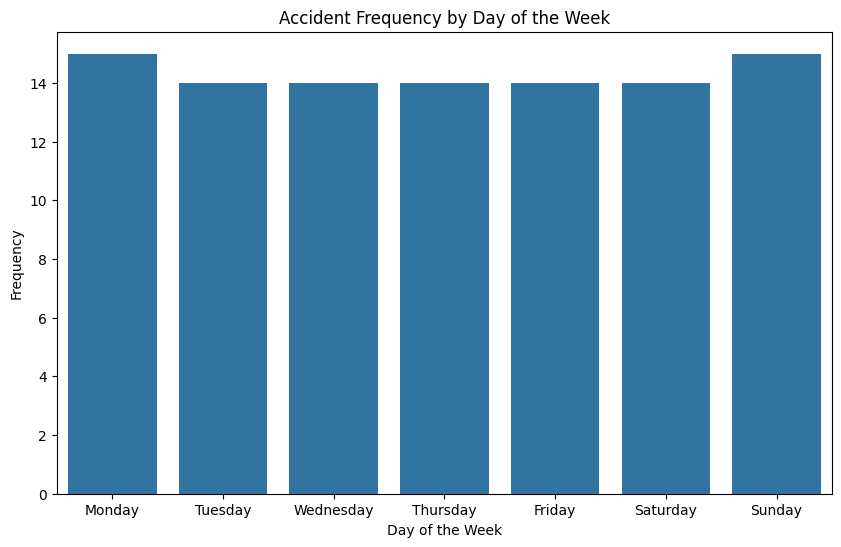

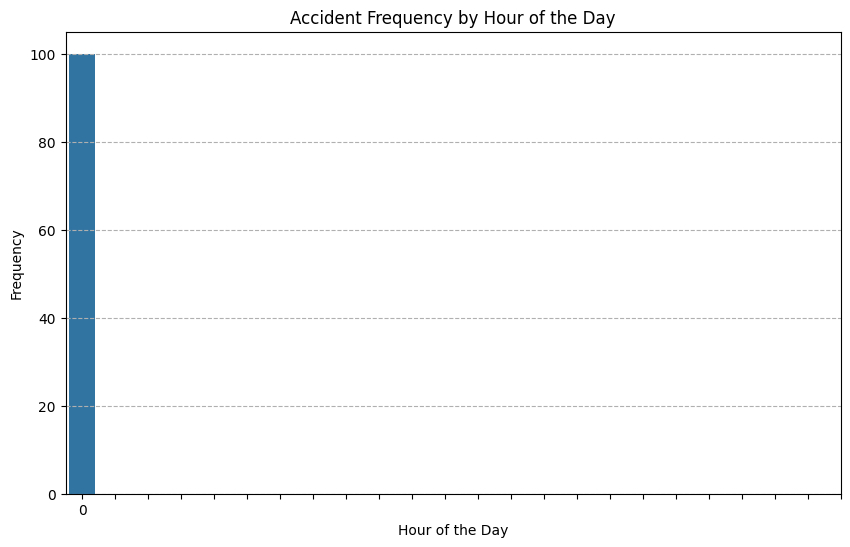

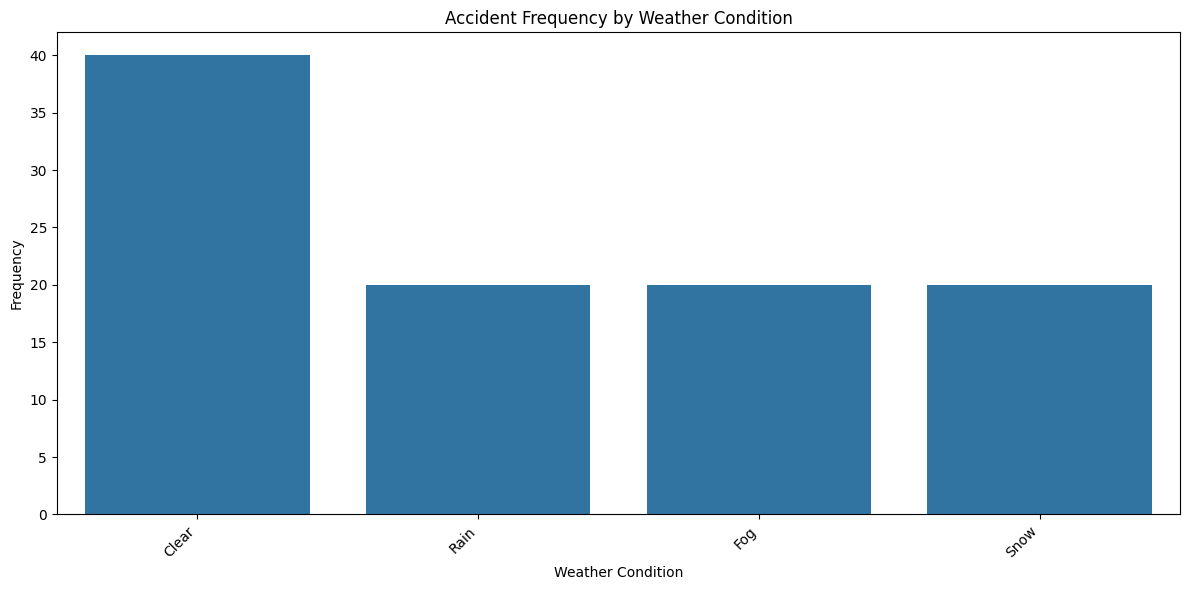

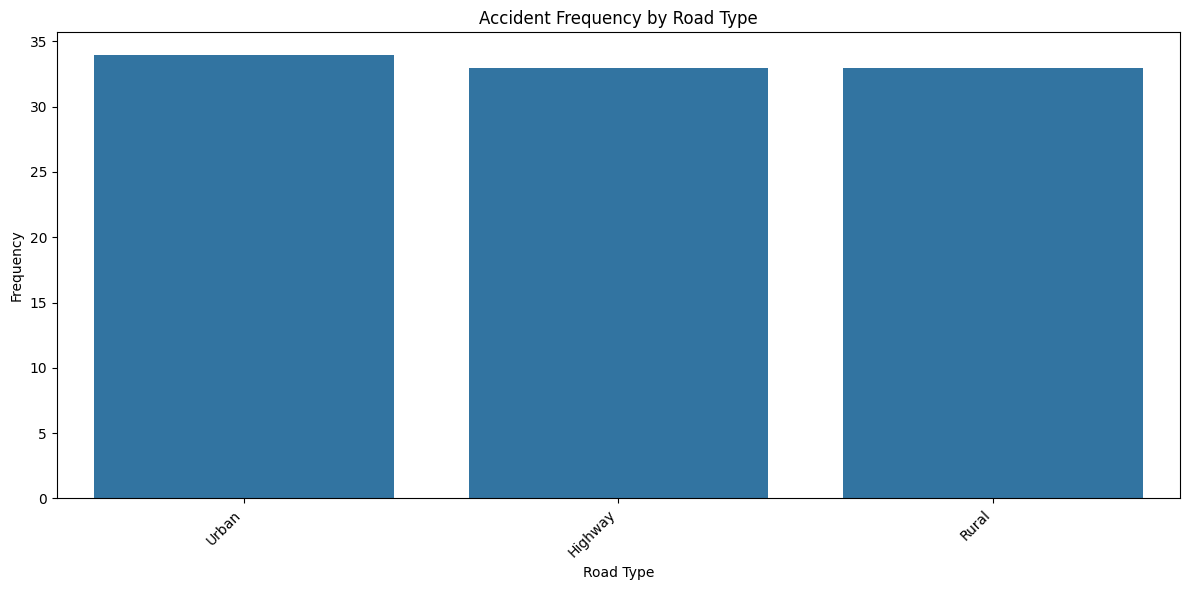

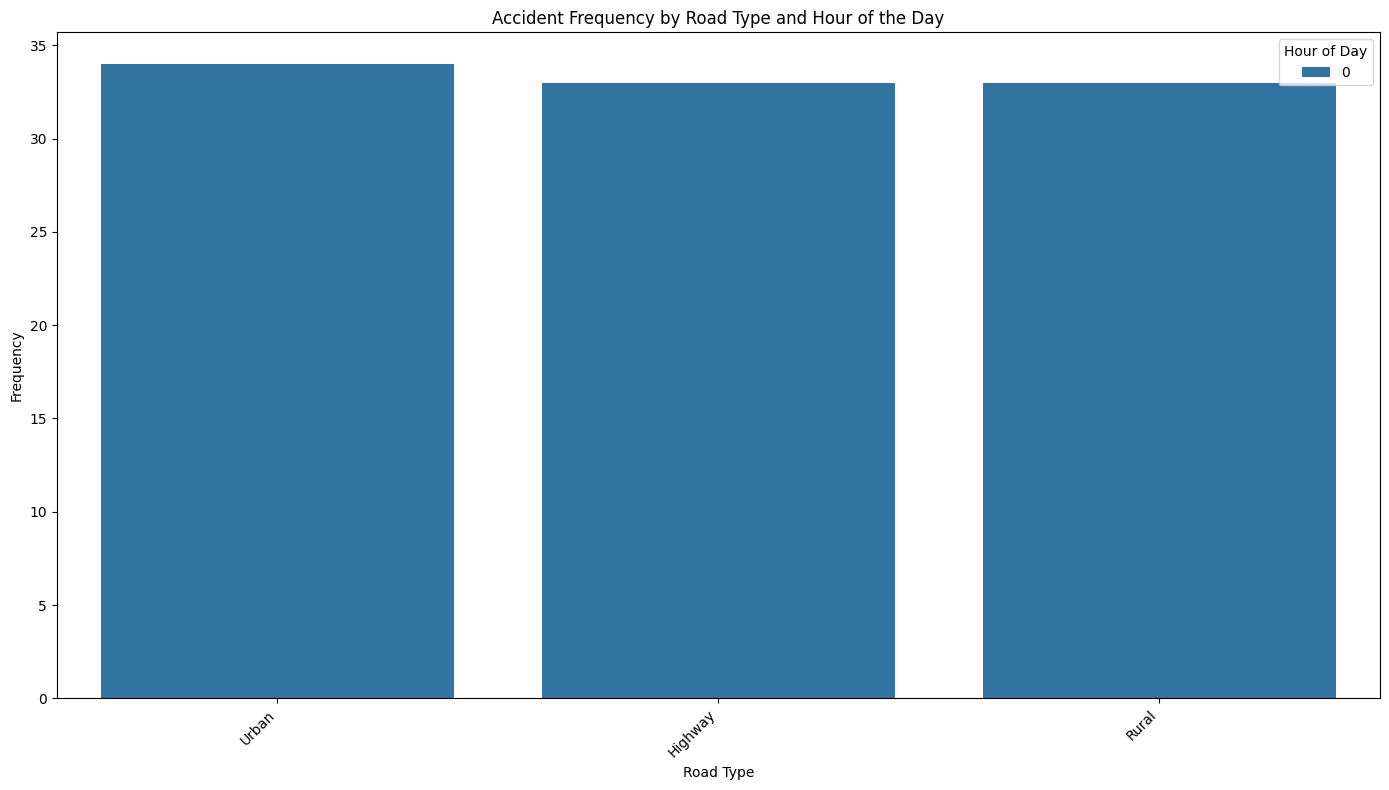

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date/time columns to datetime objects if they aren't already
date_time_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
for col in date_time_cols:
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce') # Handle potential parsing errors
    except KeyError:
        print(f"Warning: Column '{col}' not found.")

# Trend by Time
if any('date' in col.lower() for col in df.columns):
    df['year'] = df[date_time_cols[0]].dt.year if date_time_cols else None
    df['month'] = df[date_time_cols[0]].dt.month if date_time_cols else None
    df['day_of_week'] = df[date_time_cols[0]].dt.day_name() if date_time_cols else None
    df['hour'] = df[date_time_cols[0]].dt.hour if date_time_cols else None

    if 'year' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x='year')
        plt.title('Accident Frequency by Year')
        plt.xlabel('Year')
        plt.ylabel('Frequency')
        plt.show()

    if 'month' in df.columns:
        month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x='month', order=month_order)
        plt.title('Accident Frequency by Month')
        plt.xlabel('Month')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    if 'day_of_week' in df.columns:
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x='day_of_week', order=day_order)
        plt.title('Accident Frequency by Day of the Week')
        plt.xlabel('Day of the Week')
        plt.ylabel('Frequency')
        plt.show()

    if 'hour' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x='hour')
        plt.title('Accident Frequency by Hour of the Day')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Frequency')
        plt.xticks(range(24))
        plt.grid(axis='y', linestyle='--')
        plt.show()

# Trend by Weather (assuming you have a 'Weather' column)
if 'Weather' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='Weather')
    plt.title('Accident Frequency by Weather Condition')
    plt.xlabel('Weather Condition')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Trend by Location (if you have location data - you might need to aggregate or visualize on a map)
if 'Road_Type' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='Road_Type')
    plt.title('Accident Frequency by Road Type')
    plt.xlabel('Road Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Visualize accident frequency using factors like time of day and road type
if 'hour' in df.columns and 'Road_Type' in df.columns:
    plt.figure(figsize=(14, 8))
    sns.countplot(data=df, x='Road_Type', hue='hour')
    plt.title('Accident Frequency by Road Type and Hour of the Day')
    plt.xlabel('Road Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Hour of Day')
    plt.tight_layout()
    plt.show()

In [4]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()


import pandas as pd

# Ensure Date and Time are in proper datetime formats
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

# Extract hour from time
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').apply(lambda t: t.hour if pd.notnull(t) else 0)

# 1. Rush Hour Indicator (7–9 AM and 4–6 PM)
df['Rush_Hour'] = df['Hour'].apply(lambda h: 1 if (7 <= h <= 9) or (16 <= h <= 18) else 0)

# 2. Weekend Flag (Saturday=5, Sunday=6)
df['Is_Weekend'] = df['Date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

# 3. Low Visibility Condition
# Conditions include visibility < 1.0 km or weather indicates fog/snow/mist/haze
def low_visibility(row):
    # Check if 'Weather_Condition' exists in the DataFrame before accessing it.
    # If not, assume visibility is not low due to weather conditions.
    if 'Weather_Condition' in df.columns:
        weather_str = str(row['Weather_Condition']).lower()
        low_vis_weather = any(word in weather_str for word in ['fog', 'mist', 'haze', 'snow'])
    else:
        low_vis_weather = False

    # Check if 'Visibility(mi)' exists before accessing it. If not, assume visibility is not low
    # You might need to adjust the threshold (1.0) based on the units of your visibility data
    return 1 if 'Visibility(mi)' in row and row['Visibility(mi)'] < 1.0 or low_vis_weather else 0

df['Low_Visibility'] = df.apply(low_visibility, axis=1)

# View new features
print(df[['Hour', 'Rush_Hour', 'Is_Weekend', 'Low_Visibility']].head())

Saving accidents.csv to accidents (2).csv
   Hour  Rush_Hour  Is_Weekend  Low_Visibility
0     8          1           1               0
1     8          1           0               0
2     8          1           0               0
3     8          1           0               0
4     8          1           0               0
